In [1]:
import pandas as pd

In [15]:
df = pd.read_csv('results/accuracy_per_template.csv', 
                 skiprows=2,
                 names=['task_name', 'template_1', 'template_2', 'template_3']
                 )
df

,task_name,template_1,template_2,template_3
0,smaller_number,55.3,58.6,48.4
1,less_letters,46.3,52.5,24.1
2,homophones,40.0,36.2,59.5
3,first_alphabetically,57.8,56.3,56.5
4,rhyming_word,0.6,47.8,47.6
5,bigger_number,96.2,92.0,28.0


In [16]:
import os
import json
from pathlib import Path


def get_number_of_prompts(task):
    predictions_path = Path(os.getcwd()) / 'predictions' / task / 'vicuna-7b-v1-3.json'
    with open(predictions_path) as f:
        preds = json.load(f)
    return len(preds) - 1

In [17]:
df['prompts_per_templ'] = df.task_name.apply(get_number_of_prompts) / 3

for templ in range(3):
    df[f'template_{templ + 1}'] = df[f'template_{templ + 1}'] / 100
    
df

,task_name,template_1,template_2,template_3,prompts_per_templ
0,smaller_number,0.553,0.586,0.484,1000.0
1,less_letters,0.463,0.525,0.241,1000.0
2,homophones,0.400,0.362,0.595,800.0
3,first_alphabetically,0.578,0.563,0.565,1000.0
4,rhyming_word,0.006,0.478,0.476,1000.0
5,bigger_number,0.962,0.920,0.280,1000.0


In [18]:
for templ_number in range(1, 4):
    df[f'template_{templ_number}_std'] =  (
                                                  (df[f'template_{templ_number}']) * (1 - df[f'template_{templ_number}']) / df.prompts_per_templ
                                          ) ** 0.5

In [19]:
df

,task_name,template_1,template_2,template_3,prompts_per_templ,template_1_std,template_2_std,template_3_std
0,smaller_number,0.553,0.586,0.484,1000.0,0.015722,0.015576,0.015803
1,less_letters,0.463,0.525,0.241,1000.0,0.015768,0.015792,0.013525
2,homophones,0.400,0.362,0.595,800.0,0.017321,0.016991,0.017356
3,first_alphabetically,0.578,0.563,0.565,1000.0,0.015618,0.015685,0.015677
4,rhyming_word,0.006,0.478,0.476,1000.0,0.002442,0.015796,0.015793
5,bigger_number,0.962,0.920,0.280,1000.0,0.006046,0.008579,0.014199


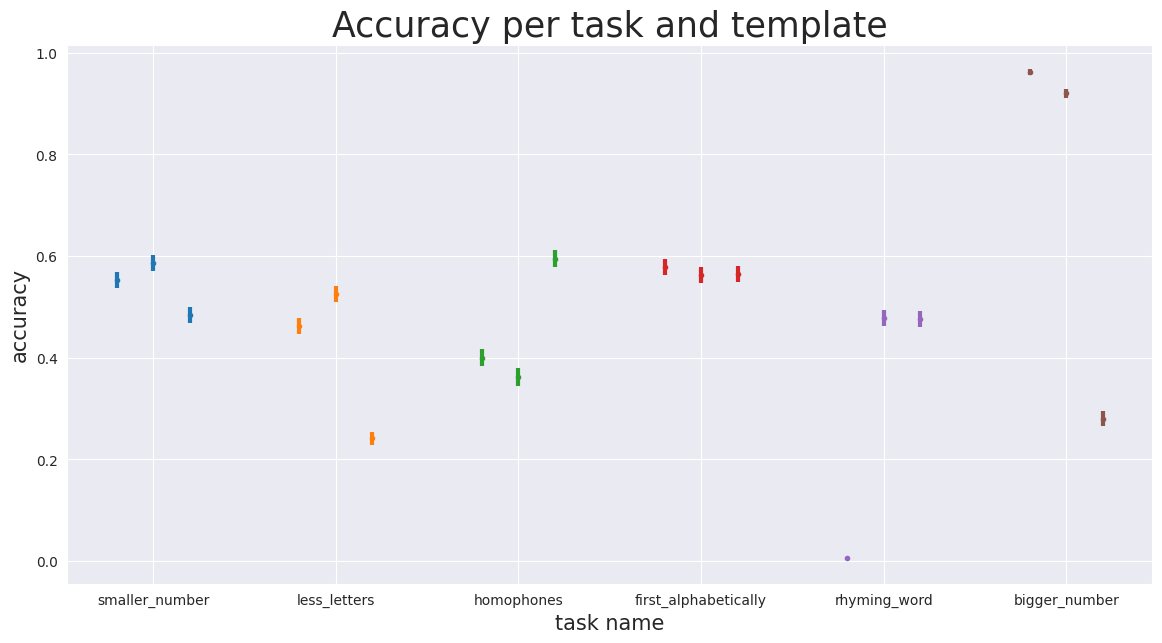

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


fig, ax = plt.subplots(figsize=(14, 7))

for (task_number,
     templ_1, templ_2, templ_3, 
     std_1, std_2, std_3) in zip(df.index, 
                       df.template_1, df.template_2, df.template_3,
                       df.template_1_std, df.template_2_std, df.template_3_std
                       ):
    plt.errorbar(list(range(task_number * 5, task_number * 5 + 3)), 
                 [templ_1, templ_2, templ_3], 
                 yerr=[std_1, std_2, std_3], 
                 fmt='.',
                 elinewidth=3
                 )

ax.set_xticks(list(range(1, df.shape[0] * 5, 5)), labels=list(df.task_name))

ax.set_xlabel('task name', fontsize=15)
ax.set_ylabel('accuracy', fontsize=15)

ax.set_title("Accuracy per task and template", fontsize=25)


plt.show()

In [47]:
df.to_csv('results.csv')